In [28]:
import shapefile
from pyproj import Proj, transform
#from mpl_toolkits.basemap import Basemap # use for map, but I can't get it to install
import matplotlib.pyplot as plt
%matplotlib inline

# data from https://city.milwaukee.gov/DownloadMapData3497.htm
# it is encoded in NAD27 in zone 4803 (Wisconsin South)

In [29]:
#f = open('ald2012.shp', 'rb')
#sf = shapefile.Reader(shp=f)
sf = shapefile.Reader('ald2016/alderman')
#sf = shapefile.Reader('hoods/neighborhood')
#sf = shapefile.Reader('poldist/poldist')
#sf = shapefile.Reader('wards/ward')

In [30]:
# converter for coordinates
inProj = Proj(init='EPSG:32054', preserve_units=True) # NAD27 Wisconsin South
outProj = Proj(proj='latlong', datum='WGS84', ellps='WGS84') # Latitude and Longitude

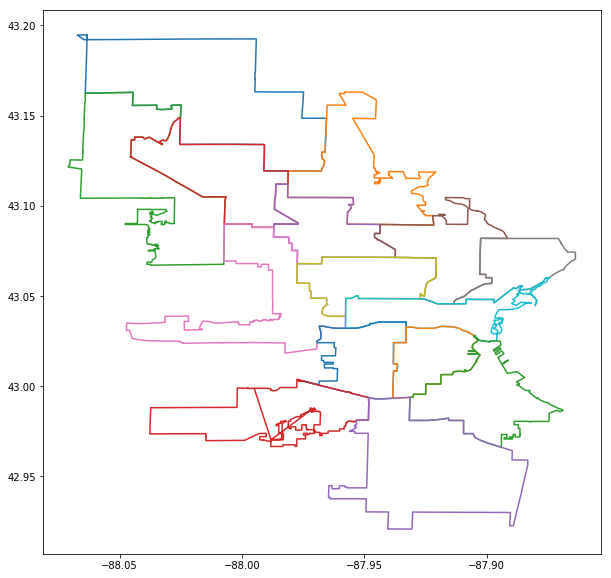

In [31]:
# initialize plot size
plt.figure(figsize=(10,10))

# loop through shapes
for i,dist in enumerate(sf.shapes()):
    xs = []
    ys = []
    
    # loop through points
    for point in dist.points:
        # parse points
        coords = ['%.3f' % coord for coord in point]
        # convert points
        x, y = transform(inProj, outProj, float(coords[0]), float(coords[1]))
        # add to list
        xs.append(x)
        ys.append(y)
        
    # plot shape
    plt.plot(xs, ys, '-')
    
plt.show()